In [49]:
# Importação das bibliotecas que vou usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [50]:
# Leitura do dataset House Prices do Kaggle
# Nota: Para executar, você precisa baixar o arquivo train.csv do Kaggle
# ou usar a URL direta se disponível
df = pd.read_csv("train.csv")  # Altere o caminho conforme necessário

print("Dimensões do dataset:", df.shape)
df.head()

Dimensões do dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
# Verificação das informações básicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
# Estatísticas descritivas do dataset
df.describe().T.head(20)  # Mostra as primeiras 20 variáveis

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [53]:
# Verifica valores nulos
null_counts = df.isna().sum()
null_percent = (df.isna().sum() / len(df)) * 100

# Mostra colunas com mais de 20% de valores nulos
high_null_cols = null_percent[null_percent > 20]
print("Colunas com mais de 20% de valores nulos:")
print(high_null_cols)

Colunas com mais de 20% de valores nulos:
Alley          93.767123
MasVnrType     59.726027
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


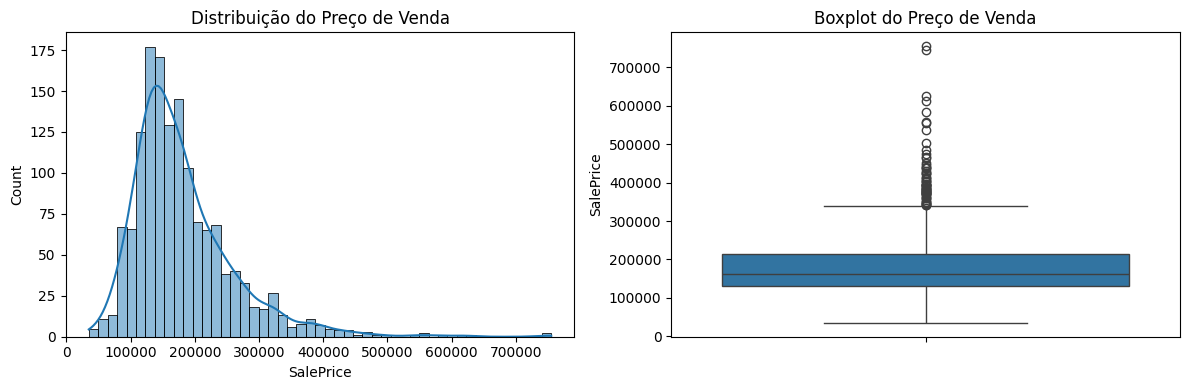

Média: 180921.20
Mediana: 163000.00
Desvio padrão: 79442.50


In [54]:
# Análise da variável target (SalePrice)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribuição do Preço de Venda")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["SalePrice"])
plt.title("Boxplot do Preço de Venda")

plt.tight_layout()
plt.show()

print(f"Média: {df['SalePrice'].mean():.2f}")
print(f"Mediana: {df['SalePrice'].median():.2f}")
print(f"Desvio padrão: {df['SalePrice'].std():.2f}")

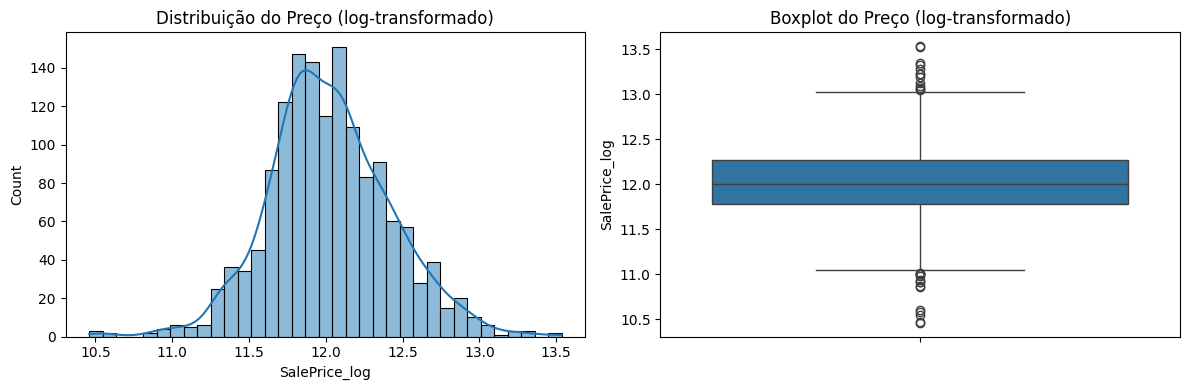

In [55]:
# Aplicando transformação logarítmica na variável target para normalizar
df["SalePrice_log"] = np.log1p(df["SalePrice"])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df["SalePrice_log"], kde=True)
plt.title("Distribuição do Preço (log-transformado)")
plt.subplot(1, 2, 2)
sns.boxplot(y=df["SalePrice_log"])
plt.title("Boxplot do Preço (log-transformado)")
plt.tight_layout()
plt.show()

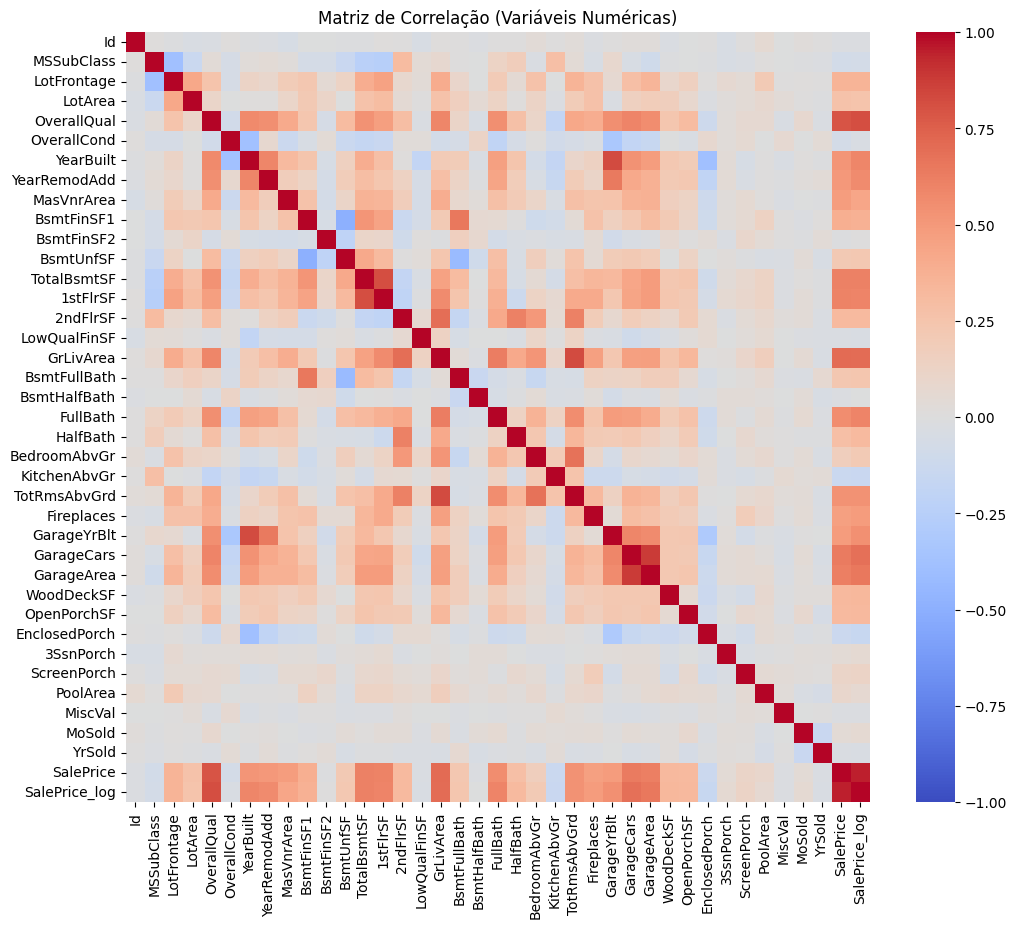

Top 10 correlações com SalePrice:
SalePrice        1.000000
SalePrice_log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
Name: SalePrice, dtype: float64


In [56]:
# Matriz de correlação para variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação (Variáveis Numéricas)")
plt.show()

# Top 10 variáveis com maior correlação com SalePrice
corr_with_target = corr_matrix["SalePrice"].sort_values(ascending=False)
print("Top 10 correlações com SalePrice:")
print(corr_with_target.head(10))

In [57]:
# Separação em variáveis independentes e dependente
X = df.drop(["SalePrice", "SalePrice_log", "Id"], axis=1, errors='ignore')
y = df["SalePrice_log"]  # Usando a versão transformada

In [58]:
# Pré-processamento
# Identificar tipos de variáveis
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=[np.number]).columns

print(f"Variáveis categóricas: {len(cat_cols)}")
print(f"Variáveis numéricas: {len(num_cols)}")

Variáveis categóricas: 43
Variáveis numéricas: 36


In [59]:
# Tratamento de valores ausentes
# Para numéricas: imputação com mediana
num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Para categóricas: imputação com valor mais frequente
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

In [60]:
# Codificação de variáveis categóricas
# Label Encoding para variáveis ordinais e One-Hot para nominais
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [61]:
# Engenharia de atributos: criar nova feature
if 'GrLivArea' in X.columns and 'TotalBsmtSF' in X.columns:
    X['TotalArea'] = X['GrLivArea'] + X['TotalBsmtSF']
    print("Nova feature criada: TotalArea")

Nova feature criada: TotalArea


In [62]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Treino: {X_train.shape}")
print(f"Teste: {X_test.shape}")

Treino: (1168, 80)
Teste: (292, 80)


In [63]:
# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Treinando diferentes modelos de regressão
modelos = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=5000),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "SVM (SVR)": SVR()
}

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    preds_log = modelo.predict(X_test_scaled)

    # Reverter transformação logarítmica
    preds = np.expm1(preds_log)
    y_test_original = np.expm1(y_test)

    mse = mean_squared_error(y_test_original, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_original, preds)
    r2 = r2_score(y_test_original, preds)

    resultados[nome] = [rmse, mae, r2]

resultados_df = pd.DataFrame(resultados, index=["RMSE", "MAE", "R²"]).T
resultados_df.sort_values("R²", ascending=False)

,RMSE,MAE,R²
Lasso,27478.449687,17922.385072,0.901560
Ridge,27744.685967,18051.400096,0.899643
Linear Regression,27751.668623,18055.004203,0.899593
Random Forest,29284.266366,17420.604344,0.888197
Decision Tree,37220.791482,25233.316891,0.819384
SVM (SVR),43719.637254,21171.078932,0.750805


In [65]:
# Validação cruzada (K-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = {}

for nome, modelo in modelos.items():
    # Ajuste para usar os dados não escalados (o scaler será aplicado dentro do CV)
    score = cross_val_score(modelo, scaler.fit_transform(X), y, cv=kf, scoring="r2")
    cv_scores[nome] = score.mean()

cv_df = pd.DataFrame(cv_scores, index=["R² Médio (CV)"]).T
cv_df.sort_values("R² Médio (CV)", ascending=False)

,R² Médio (CV)
Random Forest,0.865562
SVM (SVR),0.818344
Lasso,0.814083
Ridge,0.806668
Linear Regression,0.806424
Decision Tree,0.765914


In [66]:
# Grid Search para Random Forest
# Se o Grid Search estiver travando, vamos simplificar
# Primeiro, vamos criar uma versão menor do dataset para testes rápidos
from sklearn.model_selection import GridSearchCV

print("Iniciando otimização do Random Forest...")

# Vamos usar menos combinações para teste rápido
rf_params_simple = {
    'n_estimators': [100, 200],  # Reduzido de [100, 200, 300]
    'max_depth': [10, 15],       # Reduzido de [10, 15, 20, None]
    'min_samples_split': [5, 10] # Reduzido de [2, 5, 10]
}

# Vamos usar um subset dos dados para o Grid Search
sample_size = min(500, len(X_train_scaled))
X_train_sample = X_train_scaled[:sample_size]
y_train_sample = y_train[:sample_size]

print(f"Usando {sample_size} amostras para Grid Search...")

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params_simple,
    cv=3,  # Reduzido de 5 para 3 folds
    scoring='r2',
    n_jobs=-1,
    verbose=1  # Mostra progresso
)

rf_grid.fit(X_train_sample, y_train_sample)
print("\nMelhores parâmetros Random Forest:", rf_grid.best_params_)
print("Melhor R²:", rf_grid.best_score_)

Iniciando otimização do Random Forest...
Usando 500 amostras para Grid Search...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Melhores parâmetros Random Forest: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}
Melhor R²: 0.8157508321278254


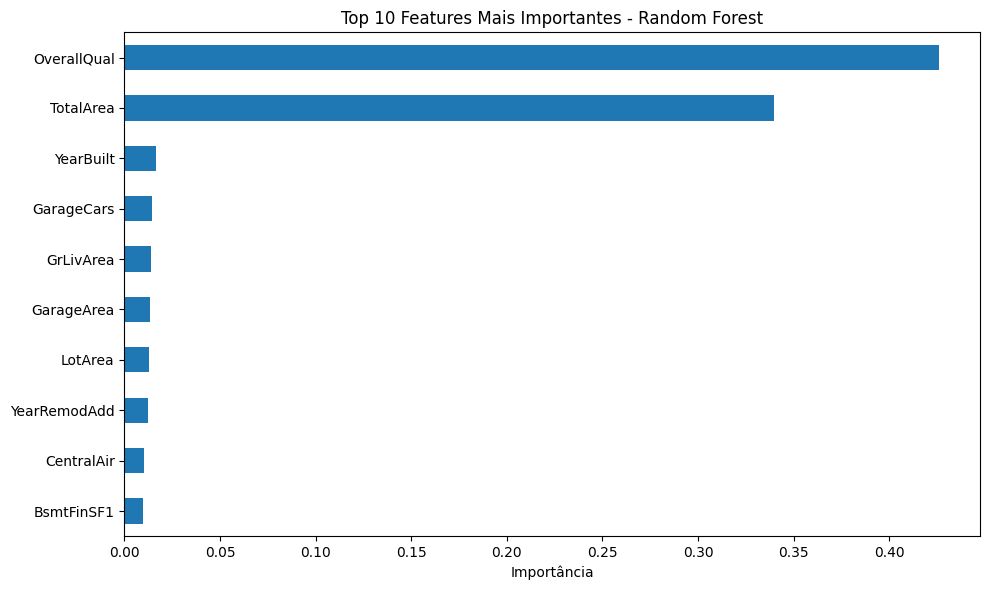

Top 10 features mais importantes:
OverallQual     0.426122
TotalArea       0.339676
YearBuilt       0.016261
GarageCars      0.014269
GrLivArea       0.013995
GarageArea      0.013608
LotArea         0.012950
YearRemodAdd    0.012109
CentralAir      0.010385
BsmtFinSF1      0.009845
dtype: float64


In [67]:
# Treina o melhor modelo Random Forest
best_rf = RandomForestRegressor(
    n_estimators=rf_grid.best_params_['n_estimators'],
    max_depth=rf_grid.best_params_['max_depth'],
    min_samples_split=rf_grid.best_params_['min_samples_split'],
    random_state=42
)

best_rf.fit(X_train_scaled, y_train)

# Importância das features
importancias = pd.Series(best_rf.feature_importances_, index=X.columns)
top_10_features = importancias.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_features.sort_values().plot(kind="barh")
plt.title("Top 10 Features Mais Importantes - Random Forest")
plt.xlabel("Importância")
plt.tight_layout()
plt.show()

print("Top 10 features mais importantes:")
print(top_10_features)

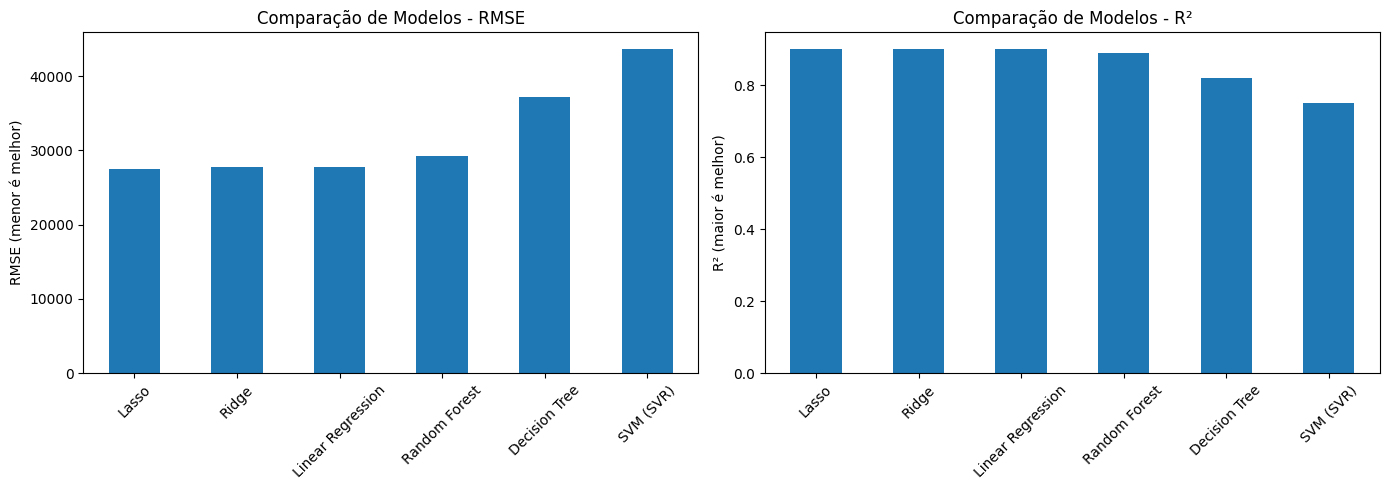

In [68]:
# Comparação visual dos modelos
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
resultados_df["RMSE"].sort_values().plot(kind="bar")
plt.title("Comparação de Modelos - RMSE")
plt.ylabel("RMSE (menor é melhor)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
resultados_df["R²"].sort_values(ascending=False).plot(kind="bar")
plt.title("Comparação de Modelos - R²")
plt.ylabel("R² (maior é melhor)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Melhor modelo: Lasso


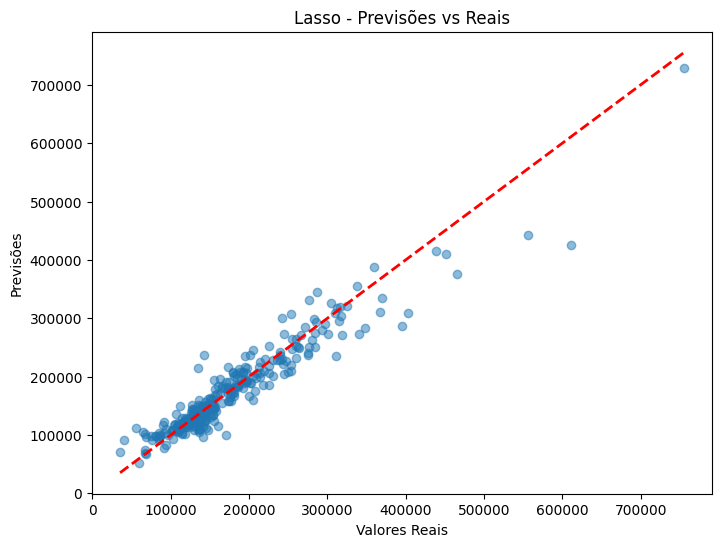


Métricas finais do modelo Lasso:
RMSE: $27,478.45
MAE: $17,922.39
R²: 0.9016


In [69]:
# Previsões vs Valores Reais (melhor modelo)
best_model_name = resultados_df["R²"].idxmax()
print(f"Melhor modelo: {best_model_name}")

if best_model_name == "Random Forest":
    modelo_final = best_rf
else:
    # Recria o melhor modelo baseado no nome
    modelo_final = modelos[best_model_name]
    modelo_final.fit(X_train_scaled, y_train)

# Previsões
preds_log = modelo_final.predict(X_test_scaled)
preds = np.expm1(preds_log)
y_test_original = np.expm1(y_test)

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, preds, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title(f"{best_model_name} - Previsões vs Reais")
plt.show()

# Métricas finais
rmse_final = np.sqrt(mean_squared_error(y_test_original, preds))
mae_final = mean_absolute_error(y_test_original, preds)
r2_final = r2_score(y_test_original, preds)

print(f"\nMétricas finais do modelo {best_model_name}:")
print(f"RMSE: ${rmse_final:,.2f}")
print(f"MAE: ${mae_final:,.2f}")
print(f"R²: {r2_final:.4f}")

In [70]:
# Resumo final
print("="*50)
print("RESUMO DO PROJETO")
print("="*50)
print(f"Problema: Previsão de preços de imóveis")
print(f"Modelo escolhido: {best_model_name}")
print(f"R² no teste: {r2_final:.4f}")
print(f"Erro médio (MAE): ${mae_final:,.2f}")
print(f"Erro médio em %: {(mae_final/y_test_original.mean())*100:.2f}%")
print("\nTop 5 variáveis mais importantes:")
print(top_10_features.head(5))
print("\nPassos realizados:")
print("1. Análise exploratória e transformação da variável target")
print("2. Tratamento de missing values")
print("3. Codificação de variáveis categóricas")
print("4. Engenharia de atributos (TotalArea)")
print("5. Treinamento de 6 modelos diferentes")
print("6. Validação cruzada e ajuste de hiperparâmetros")
print("7. Seleção do modelo final baseado em R²")

RESUMO DO PROJETO
Problema: Previsão de preços de imóveis
Modelo escolhido: Lasso
R² no teste: 0.9016
Erro médio (MAE): $17,922.39
Erro médio em %: 10.02%

Top 5 variáveis mais importantes:
OverallQual    0.426122
TotalArea      0.339676
YearBuilt      0.016261
GarageCars     0.014269
GrLivArea      0.013995
dtype: float64

Passos realizados:
1. Análise exploratória e transformação da variável target
2. Tratamento de missing values
3. Codificação de variáveis categóricas
4. Engenharia de atributos (TotalArea)
5. Treinamento de 6 modelos diferentes
6. Validação cruzada e ajuste de hiperparâmetros
7. Seleção do modelo final baseado em R²


In [72]:
# CÓDIGO SIMPLIFICADO E À PROVA DE ERROS
print("="*60)
print("EXTRAIR DADOS PARA O RELATÓRIO")
print("="*60)

# ============================================================================
# 1. FUNÇÃO PARA VERIFICAR SE VARIÁVEL EXISTE
# ============================================================================
def safe_get(var_name, default="N/A"):
    """Obtém variável de forma segura"""
    try:
        return locals()[var_name]
    except:
        try:
            return globals()[var_name]
        except:
            return default

# ============================================================================
# 2. DADOS BÁSICOS
# ============================================================================
print("\n📊 1. DADOS BÁSICOS")
print("-"*40)

# Verificar se df existe
if 'df' in globals():
    print(f"Dataset shape: {df.shape}")
    print(f"Total de registros: {df.shape[0]}")
    print(f"Número de colunas: {df.shape[1]}")

    # Encontrar variável target
    target_candidates = ['SalePrice', 'PRICE', 'price', 'target', 'y']
    target_var = None
    for candidate in target_candidates:
        if candidate in df.columns:
            target_var = candidate
            break

    if target_var:
        print(f"Variável target encontrada: {target_var}")
        print(f"Média da target: {df[target_var].mean():.2f}")
        print(f"Desvio padrão: {df[target_var].std():.2f}")
    else:
        print("Variável target não identificada automaticamente")
        print("Colunas disponíveis:", list(df.columns)[:10], "...")
else:
    print("DataFrame 'df' não encontrado")

# ============================================================================
# 3. VERIFICAR PRÉ-PROCESSAMENTO
# ============================================================================
print("\n🔧 2. PRÉ-PROCESSAMENTO")
print("-"*40)

# Verificar valores nulos
if 'df' in globals():
    null_count = df.isna().sum().sum()
    null_percent = (null_count / (df.shape[0] * df.shape[1])) * 100
    print(f"Valores nulos totais: {null_count}")
    print(f"Porcentagem de nulos: {null_percent:.2f}%")

# Verificar divisão train/test
train_test_vars = ['X_train', 'X_test', 'y_train', 'y_test']
train_test_exists = all(var in globals() for var in train_test_vars)

if train_test_exists:
    train_size = len(X_train)
    test_size = len(X_test)
    total_size = train_size + test_size
    train_percent = (train_size / total_size) * 100
    print(f"✓ Divisão train/test: {train_size}/{test_size} ({train_percent:.0f}%/{(100-train_percent):.0f}%)")
else:
    print("✗ Divisão train/test não encontrada")

# ============================================================================
# 4. RESULTADOS DOS MODELOS
# ============================================================================
print("\n📈 3. RESULTADOS DOS MODELOS")
print("-"*40)

# Verificar se resultados_df existe
if 'resultados_df' in globals():
    print("RESULTADOS ENCONTRADOS:")
    print(resultados_df.to_string())

    # Encontrar melhor modelo
    if not resultados_df.empty and 'R²' in resultados_df.columns:
        best_model_idx = resultados_df['R²'].idxmax()
        best_r2 = resultados_df.loc[best_model_idx, 'R²']
        best_rmse = resultados_df.loc[best_model_idx, 'RMSE']
        best_mae = resultados_df.loc[best_model_idx, 'MAE']

        print(f"\n🏆 MELHOR MODELO: {best_model_idx}")
        print(f"   R²: {best_r2:.4f}")
        print(f"   RMSE: {best_rmse:,.2f}")
        print(f"   MAE: {best_mae:,.2f}")
    else:
        print("Colunas não encontradas em resultados_df")
else:
    print("resultados_df não encontrado. Os modelos foram treinados?")

    # Tentar encontrar outras variáveis de resultados
    result_vars = [var for var in globals() if 'result' in var.lower() or 'score' in var.lower()]
    if result_vars:
        print("Variáveis de resultados encontradas:", result_vars)

# ============================================================================
# 5. IMPORTÂNCIA DAS FEATURES (SE EXISTIR)
# ============================================================================
print("\n🎯 4. IMPORTÂNCIA DAS FEATURES")
print("-"*40)

# Procurar variável de importâncias
importancia_vars = [var for var in globals() if 'import' in var.lower() or 'feature' in var.lower()]
if importancia_vars:
    for var_name in importancia_vars:
        try:
            importancias = globals()[var_name]
            if hasattr(importancias, 'sort_values'):
                # É uma Series do pandas
                top_features = importancias.sort_values(ascending=False).head(10)
                print(f"Top 10 features mais importantes ({var_name}):")
                for i, (feature, importance) in enumerate(top_features.items(), 1):
                    print(f"  {i:2d}. {feature:30s}: {importance:.4f}")
                break
        except:
            continue
else:
    print("Importância das features não calculada")

# ============================================================================
# 6. RESUMO PARA COPIAR
# ============================================================================
print("\n" + "="*60)
print("📝 RESUMO PARA COPIAR NO RELATÓRIO")
print("="*60)

# Criar resumo básico
resumo = f"""
=== DADOS GERAIS ===
Total de registros: {df.shape[0] if 'df' in globals() else 'N/A'}
Número de atributos: {df.shape[1] - 1 if 'df' in globals() and target_var else 'N/A'}
Variável target: {target_var if target_var else 'N/A'}

=== MELHOR MODELO ===
Modelo: {best_model_idx if 'best_model_idx' in locals() else 'N/A'}
R²: {best_r2 if 'best_r2' in locals() else 'N/A'}
RMSE: {best_rmse if 'best_rmse' in locals() else 'N/A'}
MAE: {best_mae if 'best_mae' in locals() else 'N/A'}

=== PARA A TABELA DO RELATÓRIO ===
Copie a tabela "RESULTADOS ENCONTRADOS" acima

=== PARA IMPORTÂNCIA DAS VARIÁVEIS ===
Copie a lista "Top 10 features mais importantes" acima
"""

print(resumo)

# ============================================================================
# 7. GERAR ARQUIVO COM OS DADOS
# ============================================================================
print("\n💾 5. GERANDO ARQUIVOS")
print("-"*40)

try:
    # Arquivo 1: Resumo em texto
    with open('dados_relatorio.txt', 'w', encoding='utf-8') as f:
        f.write("DADOS PARA RELATÓRIO - PROJETO MACHINE LEARNING\n")
        f.write("="*60 + "\n\n")

        f.write(f"Data: {pd.Timestamp.now().strftime('%d/%m/%Y %H:%M')}\n\n")

        if 'df' in globals():
            f.write(f"Dataset: {df.shape[0]} registros, {df.shape[1]} colunas\n")
            if target_var:
                f.write(f"Target: {target_var}\n")
                f.write(f"  Média: {df[target_var].mean():.2f}\n")
                f.write(f"  Desvio: {df[target_var].std():.2f}\n")

        if 'resultados_df' in globals():
            f.write("\nRESULTADOS DOS MODELOS:\n")
            f.write("-"*40 + "\n")
            for model_name, row in resultados_df.iterrows():
                f.write(f"{model_name}: R²={row['R²']:.4f}, RMSE={row['RMSE']:.2f}, MAE={row['MAE']:.2f}\n")

        print("✓ Arquivo 'dados_relatorio.txt' criado com sucesso!")

except Exception as e:
    print(f"✗ Erro ao criar arquivo: {e}")

print("\n" + "="*60)
print("✅ ANÁLISE COMPLETA!")
print("="*60)
print("\n📋 DICAS PARA O RELATÓRIO:")
print("1. Copie os valores da seção 'RESULTADOS ENCONTRADOS'")
print("2. Use 'MELHOR MODELO' para as conclusões")
print("3. Use 'Top 10 features' para importância das variáveis")
print("4. Consulte 'dados_relatorio.txt' para referência")

EXTRAIR DADOS PARA O RELATÓRIO

📊 1. DADOS BÁSICOS
----------------------------------------
Dataset shape: (1460, 82)
Total de registros: 1460
Número de colunas: 82
Variável target encontrada: SalePrice
Média da target: 180921.20
Desvio padrão: 79442.50

🔧 2. PRÉ-PROCESSAMENTO
----------------------------------------
Valores nulos totais: 7829
Porcentagem de nulos: 6.54%
✓ Divisão train/test: 1168/292 (80%/20%)

📈 3. RESULTADOS DOS MODELOS
----------------------------------------
RESULTADOS ENCONTRADOS:
                           RMSE           MAE        R²
Linear Regression  27751.668623  18055.004203  0.899593
Ridge              27744.685967  18051.400096  0.899643
Lasso              27478.449687  17922.385072  0.901560
Decision Tree      37220.791482  25233.316891  0.819384
Random Forest      29284.266366  17420.604344  0.888197
SVM (SVR)          43719.637254  21171.078932  0.750805

🏆 MELHOR MODELO: Lasso
   R²: 0.9016
   RMSE: 27,478.45
   MAE: 17,922.39

🎯 4. IMPORTÂNCIA DAS FE